# Testing Influencer GNN

In [1]:
%load_ext autoreload
%autoreload 2

# System imports
import os
import sys
import yaml

# External imports
import matplotlib.pyplot as plt
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import WandbLogger

import warnings

warnings.filterwarnings("ignore")
sys.path.append("../")
device = "cuda" if torch.cuda.is_available() else "cpu"

from lightning_modules.toyGNN.submodels.influencer_embedding import InfluencerEmbedding

In [2]:
# load config
with open("influencer_config.yaml", "r") as f:
    config = yaml.safe_load(f)

In [3]:
model = InfluencerEmbedding(config)

## Test Dataloading

In [4]:
model.setup(stage="fit")

In [5]:
sample = model.valset[0]

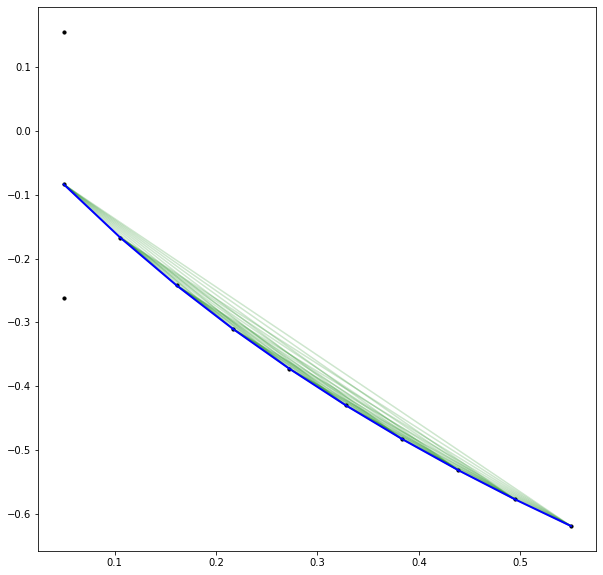

In [6]:
# Plot the graph
def plot_graph(sample):
    _, ax = plt.subplots(figsize=(10,10))
    ax.scatter(sample.x[:,0], sample.x[:,1], s=10, c="k")
    ax.plot(sample.x[sample.all_signal_edges,0], sample.x[sample.all_signal_edges,1], c='g', alpha=0.1)
    ax.plot(sample.x[sample.seq_signal_edges,0], sample.x[sample.seq_signal_edges,1], c='b', alpha=1, linewidth=2)
    plt.show()

plot_graph(sample)

## Train Model

In [7]:
logger = WandbLogger(
    project=config["project"], group="InitialTest", save_dir=config["artifacts"]
)
trainer = Trainer(
    gpus=1, max_epochs=config["max_epochs"], logger=logger, num_sanity_val_steps=0
)
trainer.fit(model)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: murnanedaniel. Use `wandb login --relogin` to force relogin


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name               | Type       | Params
--------------------------------------------------
0 | user_network       | Sequential | 795 K 
1 | influencer_network | Sequential | 795 K 
--------------------------------------------------
1.6 M     Trainable params
0         Non-trainable params
1.6 M     Total params
6.365     Total estimated model params size (MB)


Epoch 9: 100%|██████████| 105/105 [00:01<00:00, 63.13it/s, loss=0.077, v_num=6k0q]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 105/105 [00:01<00:00, 62.25it/s, loss=0.077, v_num=6k0q]
